In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Money/training_data',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')                                             
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Money/training_data',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
                                               

Found 1179 images belonging to 11 classes.
Found 1179 images belonging to 11 classes.


In [ ]:
training_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '200đ': 4,
 '20k': 5,
 '2k': 6,
 '500k': 7,
 '500đ': 8,
 '50k': 9,
 '5k': 10}

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
# example output part of the model
from keras.layers import Flatten
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(11, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9) # lr learning rate : tốc độ học
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_set,epochs=20,batch_size=64,validation_data=validation_set,verbose=1)


Epoch 1/20
37/37 [==============================] - 13s 289ms/step - loss: 9.4104 - accuracy: 0.6404 - val_loss: 0.4287 - val_accuracy: 0.8991
Epoch 2/20
37/37 [==============================] - 11s 297ms/step - loss: 0.1424 - accuracy: 0.9729 - val_loss: 4.8918e-04 - val_accuracy: 1.0000
Epoch 3/20
37/37 [==============================] - 10s 282ms/step - loss: 1.5903e-04 - accuracy: 1.0000 - val_loss: 3.0870e-05 - val_accuracy: 1.0000
Epoch 4/20
37/37 [==============================] - 11s 285ms/step - loss: 2.2974e-05 - accuracy: 1.0000 - val_loss: 8.4753e-06 - val_accuracy: 1.0000
Epoch 5/20
37/37 [==============================] - 10s 278ms/step - loss: 3.8630e-06 - accuracy: 1.0000 - val_loss: 1.8129e-06 - val_accuracy: 1.0000
Epoch 6/20
37/37 [==============================] - 11s 291ms/step - loss: 1.2553e-06 - accuracy: 1.0000 - val_loss: 7.4882e-07 - val_accuracy: 1.0000
Epoch 7/20
37/37 [==============================] - 11s 292ms/step - loss: 5.8967e-07 - accuracy: 1.0000 -

In [ ]:
model.save('tien10.h5')

In [ ]:
tien10_model = load_model('tien10.h5')

In [ ]:
score=tien10_model.evaluate(validation_set,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

37/37 [==============================] - 5s 133ms/step - loss: 1.4883e-07 - accuracy: 1.0000
Test loss =  1.4883457311043458e-07
Test accuracy =  1.0


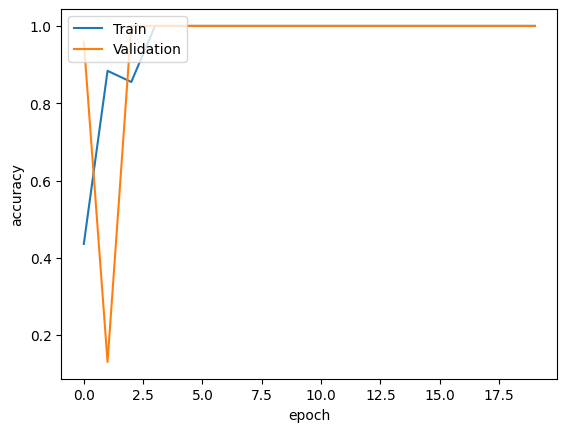

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 348ms/step
Predict is:  100k


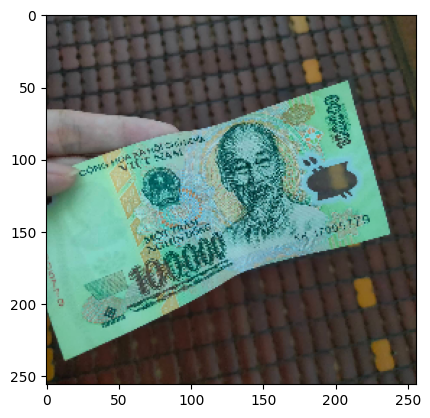

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Money/Money/testing_data/100k.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['100k',
 '10k',
 '1k',
 '200k',
 '2k',
 '500k',
 '5k']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 27ms/step
Predict is:  10k


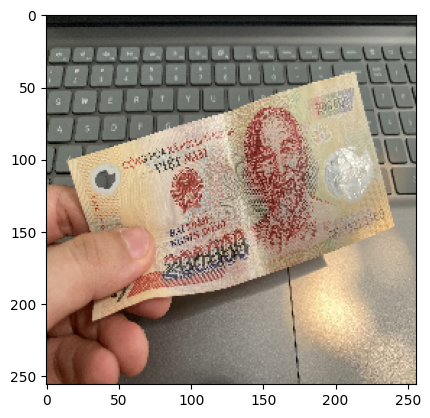

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Money/Money/testing_data/200k.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['100k',
 '10k',
 '1k',
 '200k',
 '2k',
 '500k',
 '5k']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 20ms/step
Predict is:  10k


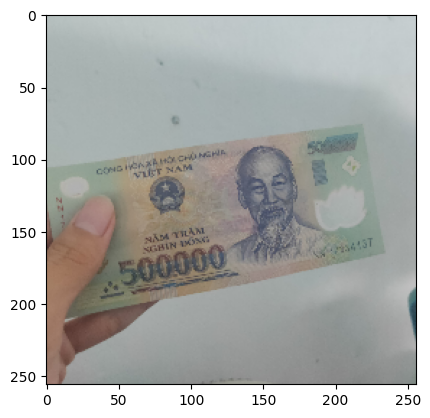

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Money/Money/testing_data/500k.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['100k',
 '10k',
 '1k',
 '200k',
 '2k',
 '500k',
 '5k']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('tien10.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2023-04-17 17:56:40--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-04-17 17:56:40 (27.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurab

'File Download Unsuccessful. Saved in Google Drive'